## Planting Example

Below I create a code example where I plant a region containing 5% of the points and make this region anomalous. Inside of the region 80% of the points are from the red set while outside of the region 50% of the points are red. We would like to recover this planted region by using the max_halfplane scanning algorithm.

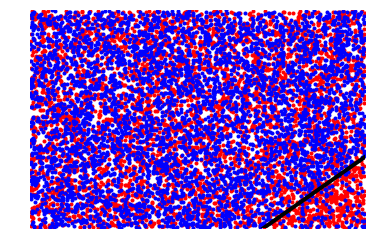

In [12]:
import pyscan
import matplotlib.pyplot as plt
import numpy as np
import random

def get_coord(i, lst):
    return [pt[i] for pt in lst]


# l = (a, b, c) where ax + by + c = 0 => (-ax -c) / b = y
def f(mr, x):
        l = mr.get_coords()
        return -(x * l[0] + l[2]) / l[1]

def plot_plane(red, blue, max_region, eps):
    
    n = np.rint(1 / eps)
    s = np.rint(1 / (2 * eps * eps))
    # create a region containing 5% of the points. Inside of this region points are more likely to be red. 
    #print(get_coord(1, red))
    plt.scatter(get_coord(0, red), get_coord(1, red), marker=".", c="r")
    plt.scatter(get_coord(0, blue), get_coord(1, blue), marker=".", c="b")

    net = pyscan.my_sample(red, n) + pyscan.my_sample(blue, n)
    red_s = pyscan.my_sample(red, s)
    blue_s = pyscan.my_sample(blue, s)
    approx_region, _ = pyscan.max_halfplane(net, red_s, blue_s, pyscan.KULLDORF)
    
    plt.scatter(get_coord(0, net), get_coord(1, net), marker="x", c="k")
    plt.plot([0, 1], [f(max_region, 0), f(max_region, 1)], c="k", linewidth=4.0)
    plt.plot([0, 1], [f(approx_region, 0), f(approx_region, 1)], c="g", linewidth=4.0)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.axis('off')
    plt.show()


    
#Change the initial example to be 50 50 and 100 pts.

# generate some random points
pts = [pyscan.WPoint(1.0, random.random(), random.random(), 1.0) for i in range(10000)]
red, blue, max_region = pyscan.plant_halfplane(pts, .05, .5, .8)
f, ax = plt.subplots(figsize=(18, 7))

ax.scatter(get_coord(0, red), get_coord(1, red), marker=".", c="r")
ax.scatter(get_coord(0, blue), get_coord(1, blue), marker=".", c="b")
ax.plot([0, 1], [f(max_region, 0), f(max_region, 1)], c="k", linewidth=4.0)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.axis('off')
plt.show()

The algorithms will subsample the data based on an error parameter called $\varepsilon$. There will be two samples uses in the algorithm one of size $O(1/\varepsilon)$ and another of size $O(1/\varepsilon^2)$. If we do not set $\varepsilon$ to be small enough we will not recover the region. Below I steadily decrease $\varepsilon$ and therefore increase the sample sizes. At first we will not recover the anomalous region.

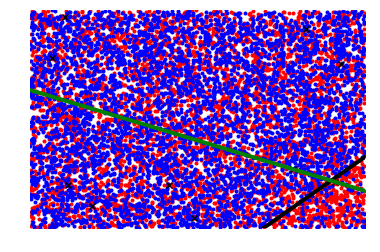

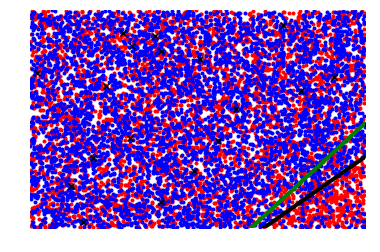

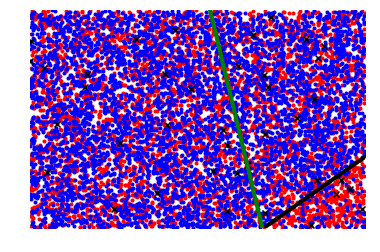

In [13]:
plot_plane(red, blue, max_region, .2)
plot_plane(red, blue, max_region, .1)
plot_plane(red, blue, max_region, .05)

Around .025 we get start getting very close to recovering the region and at .01 we almost perfectly recover it.

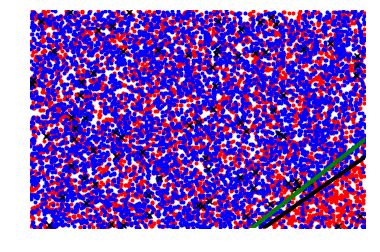

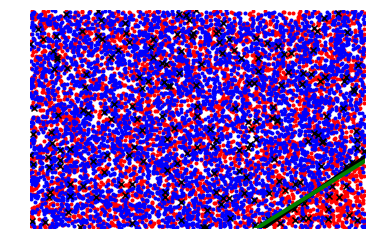

In [14]:
plot_plane(red, blue, max_region, .025)
plot_plane(red, blue, max_region, .01)

We can plant a different where 60% of the points are from the anomalous red set and leave the baseline set at 50/50. This makes the region much harder to recover.

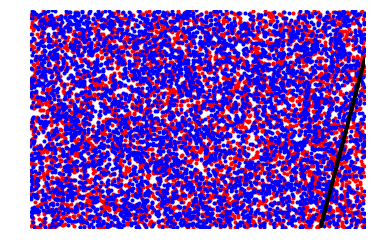

In [16]:
red, blue, max_region = pyscan.plant_halfplane(pts, .05, .5, .6)

plt.scatter(get_coord(0, red), get_coord(1, red), marker=".", c="r")
plt.scatter(get_coord(0, blue), get_coord(1, blue), marker=".", c="b")
plt.plot([0, 1], [f(max_region, 0), f(max_region, 1)], c="k", linewidth=4.0)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.axis("off")
plt.show()

We now fail to recover the region with the earlier parameters that were able to recover the region. 

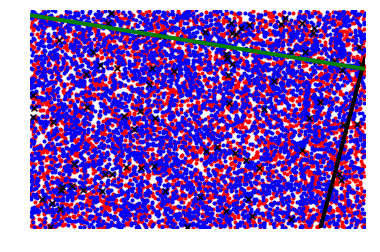

In [17]:
plot_plane(red, blue, max_region, .025)

Increasing the error paramter even more allows us to again recover the region.

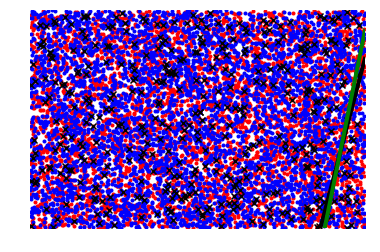

In [20]:
plot_plane(red, blue, max_region, .005)